In [1]:
#Run the kSZ 4-point function
#
#
from os.path import join as opj, dirname
import os
os.environ["DISABLE_MPI"]="true"
from pixell import curvedsky, enmap
import healpy as hp
import yaml
import argparse
from orphics import maps
import numpy as np
import matplotlib.pyplot as plt
import pickle
import astropy.io.fits as afits 

In [2]:
m = enmap.read_map("/global/cfs/cdirs/act/data/synced_maps/ILC_MAPS/20230606/ilc_fullRes_TT.fits")

In [3]:
source_data = np.genfromtxt("/global/homes/m/maccrann/cmb/ksz2/dr6_plus/test_nsigma5/region_07_cat.txt")
print(source_da

In [4]:

print(snr)
use = snr>10
print(use)
source_data = source_data[use]
print(len(source_data))

[ 13.522221   13.357582   13.153248   13.100925   12.192725   12.042225
  11.922239   11.457951   11.388335   11.1936245  11.174015   11.11872
  11.019403   10.772581   10.563729   10.473103   10.410081   10.255385
  10.148676   10.107803   10.08771     9.95445     9.91877     9.85043
   9.835111    9.778629    9.714208    9.671914    9.503869    9.46608
   9.215048    9.195537    9.078024    8.972591    8.940702    8.74643
   8.702763    8.68782     8.607035    8.579971    8.493296    8.318628
   8.268739    7.9867105   7.87589     7.6681952   7.6602902   7.6401954
   7.601497    7.5486116   7.476896    7.4505024   7.3364882   7.277581
   7.274798    7.271158    7.2061577   7.204392    7.1979604   7.1895237
   7.1640134   7.1599603   7.0799      7.0746274   7.0266733   6.999498
   6.983357    6.9204664   6.8677077   6.8324437   6.6833024   6.6130166
   6.6048727   6.567956    6.5602217   6.556492    6.541778    6.499818
   6.483848    6.478192    6.4488544   6.4339733   6.4249215   6.

In [9]:
from pixell.reproject import thumbnails

coords = np.zeros((len(source_data),2))
coords[:,0]=np.radians(source_data["dec"])
coords[:,1]=np.radians(source_data["ra"])

stamps = thumbnails(m, coords)
print("got %d stamps"%len(stamps))

got 21 stamps


/tmp/ipykernel_926418/1497848428.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax=plt.subplots(figsize=(3,3))


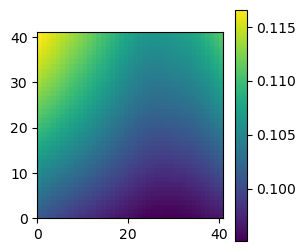

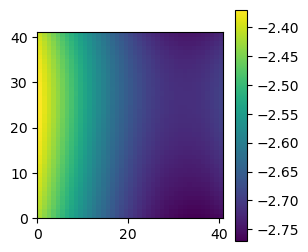

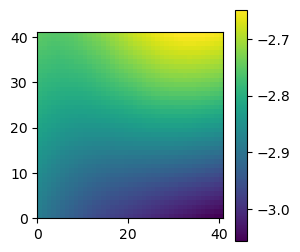

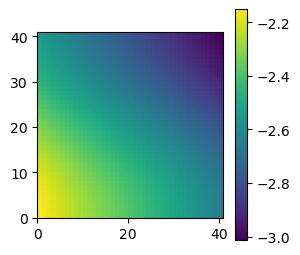

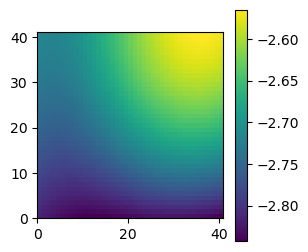

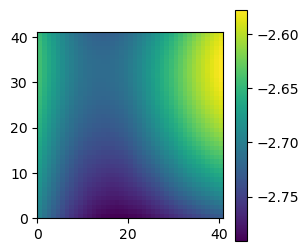

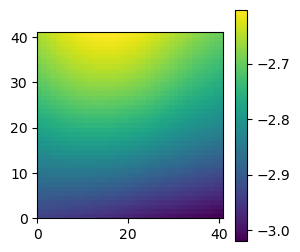

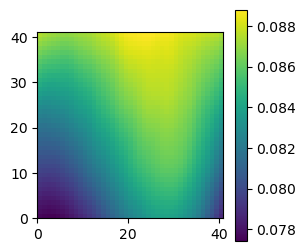

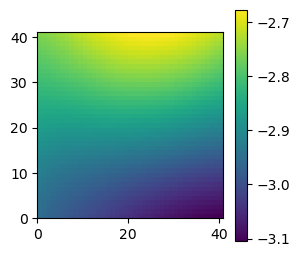

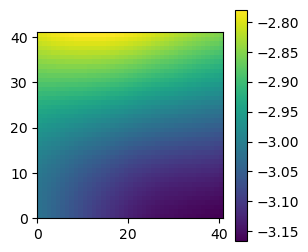

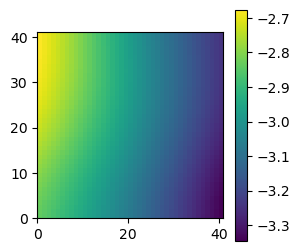

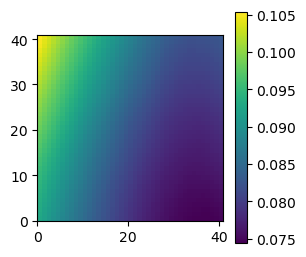

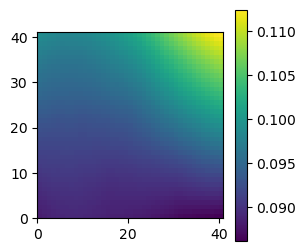

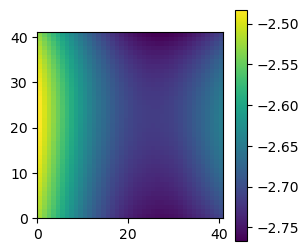

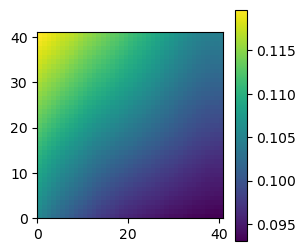

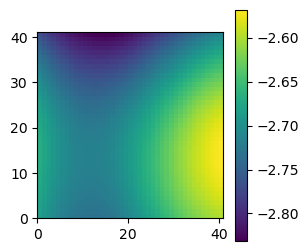

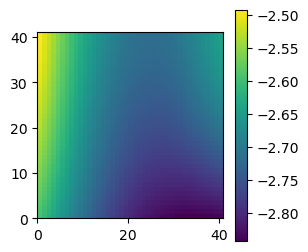

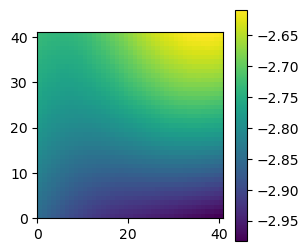

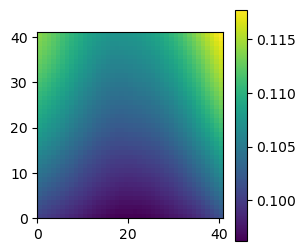

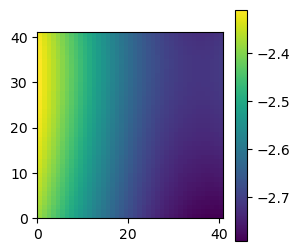

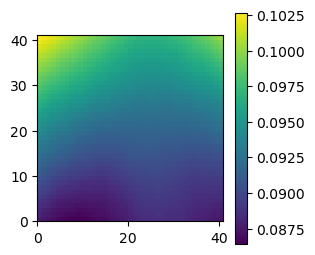

In [10]:
%matplotlib inline

for stamp in stamps:
    fig,ax=plt.subplots(figsize=(3,3))
    ax.set_aspect("equal")
    im=ax.pcolormesh(stamp)
    fig.colorbar(im)